Построение SVM и выбор оптимального ядра.
Цель: Цель данного ДЗ - "потрогать" алгоритм SVM на практике. Возьмите один из двух датасетов (или выберете свой) и попробуйте получить на нем максимальные метрики качества, используя алгоритм SVM. Проведите сравнение с Логистической регрессией. Используйте техники Feature Preprocessing, изученные ранее. Два датасета: 1) https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge 2) https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/overview С обоими датасетами вы уже знакомы - один был в ДЗб другой на лекции про Feature Preprocessing.


1) Возьмите датасет, выполните предобработку


## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.shape

(114321, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
data.drop(['ID'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 132 entries, target to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 115.1+ MB


##### NB: 19  категориальных данных

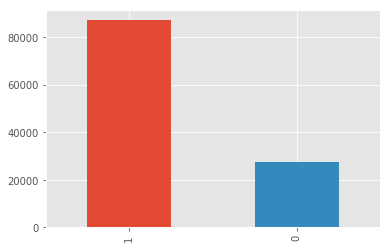

In [7]:
data['target'].value_counts().plot.bar()

#####  Распределение целевой переменной - несбалансированное

#### NAN значение: ТОП 30 признаков с наибольшими пустыми данными

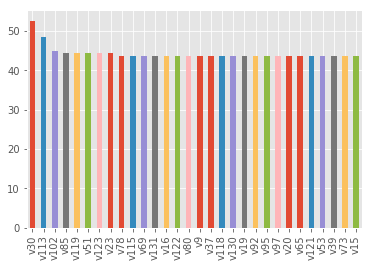

In [10]:
nan_vals = data.isnull().sum()/data.shape[0]*100
nan_vals.sort_values(ascending=False)[:30].plot.bar()

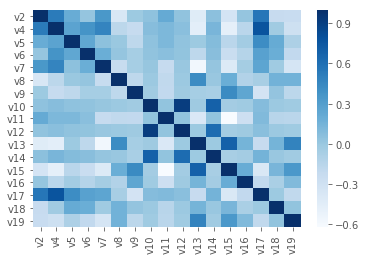

In [9]:
sns.heatmap(data.iloc[:,2:20].corr(), cmap="Blues")

##### 20 первых признаков имеют сильно скоррелированные данные

## План feature engineering
* очистить от скоррелированных признаков
* заменить NAN модой
* обработать категориальные данные
* обработать выбросы

2) Попробуйте изученные алгоритмы: kNN, Logistic Regression, SVM


3) Выполните настройку гиперпараметров для SVM (выбрать те параметры (ядро, регуляризацияб и тд) при которых метрики максимальны)

4*) Настройку гиперпараметров можно проводить используя GridSearchCV в реализации sklearn.


Критерии оценки: - Выполнена предобработка данных, преобразования признаков, посчитаны базовые статистики
- Построено хотя бы два алгоритма и показана разница результатов (или отсутствие разницы)
- Обучен SVM, выполнен подбор гиперпараметров